In [ ]:
import pandas as pd
df= pd.read_excel('Output_Bucket.xlsx')

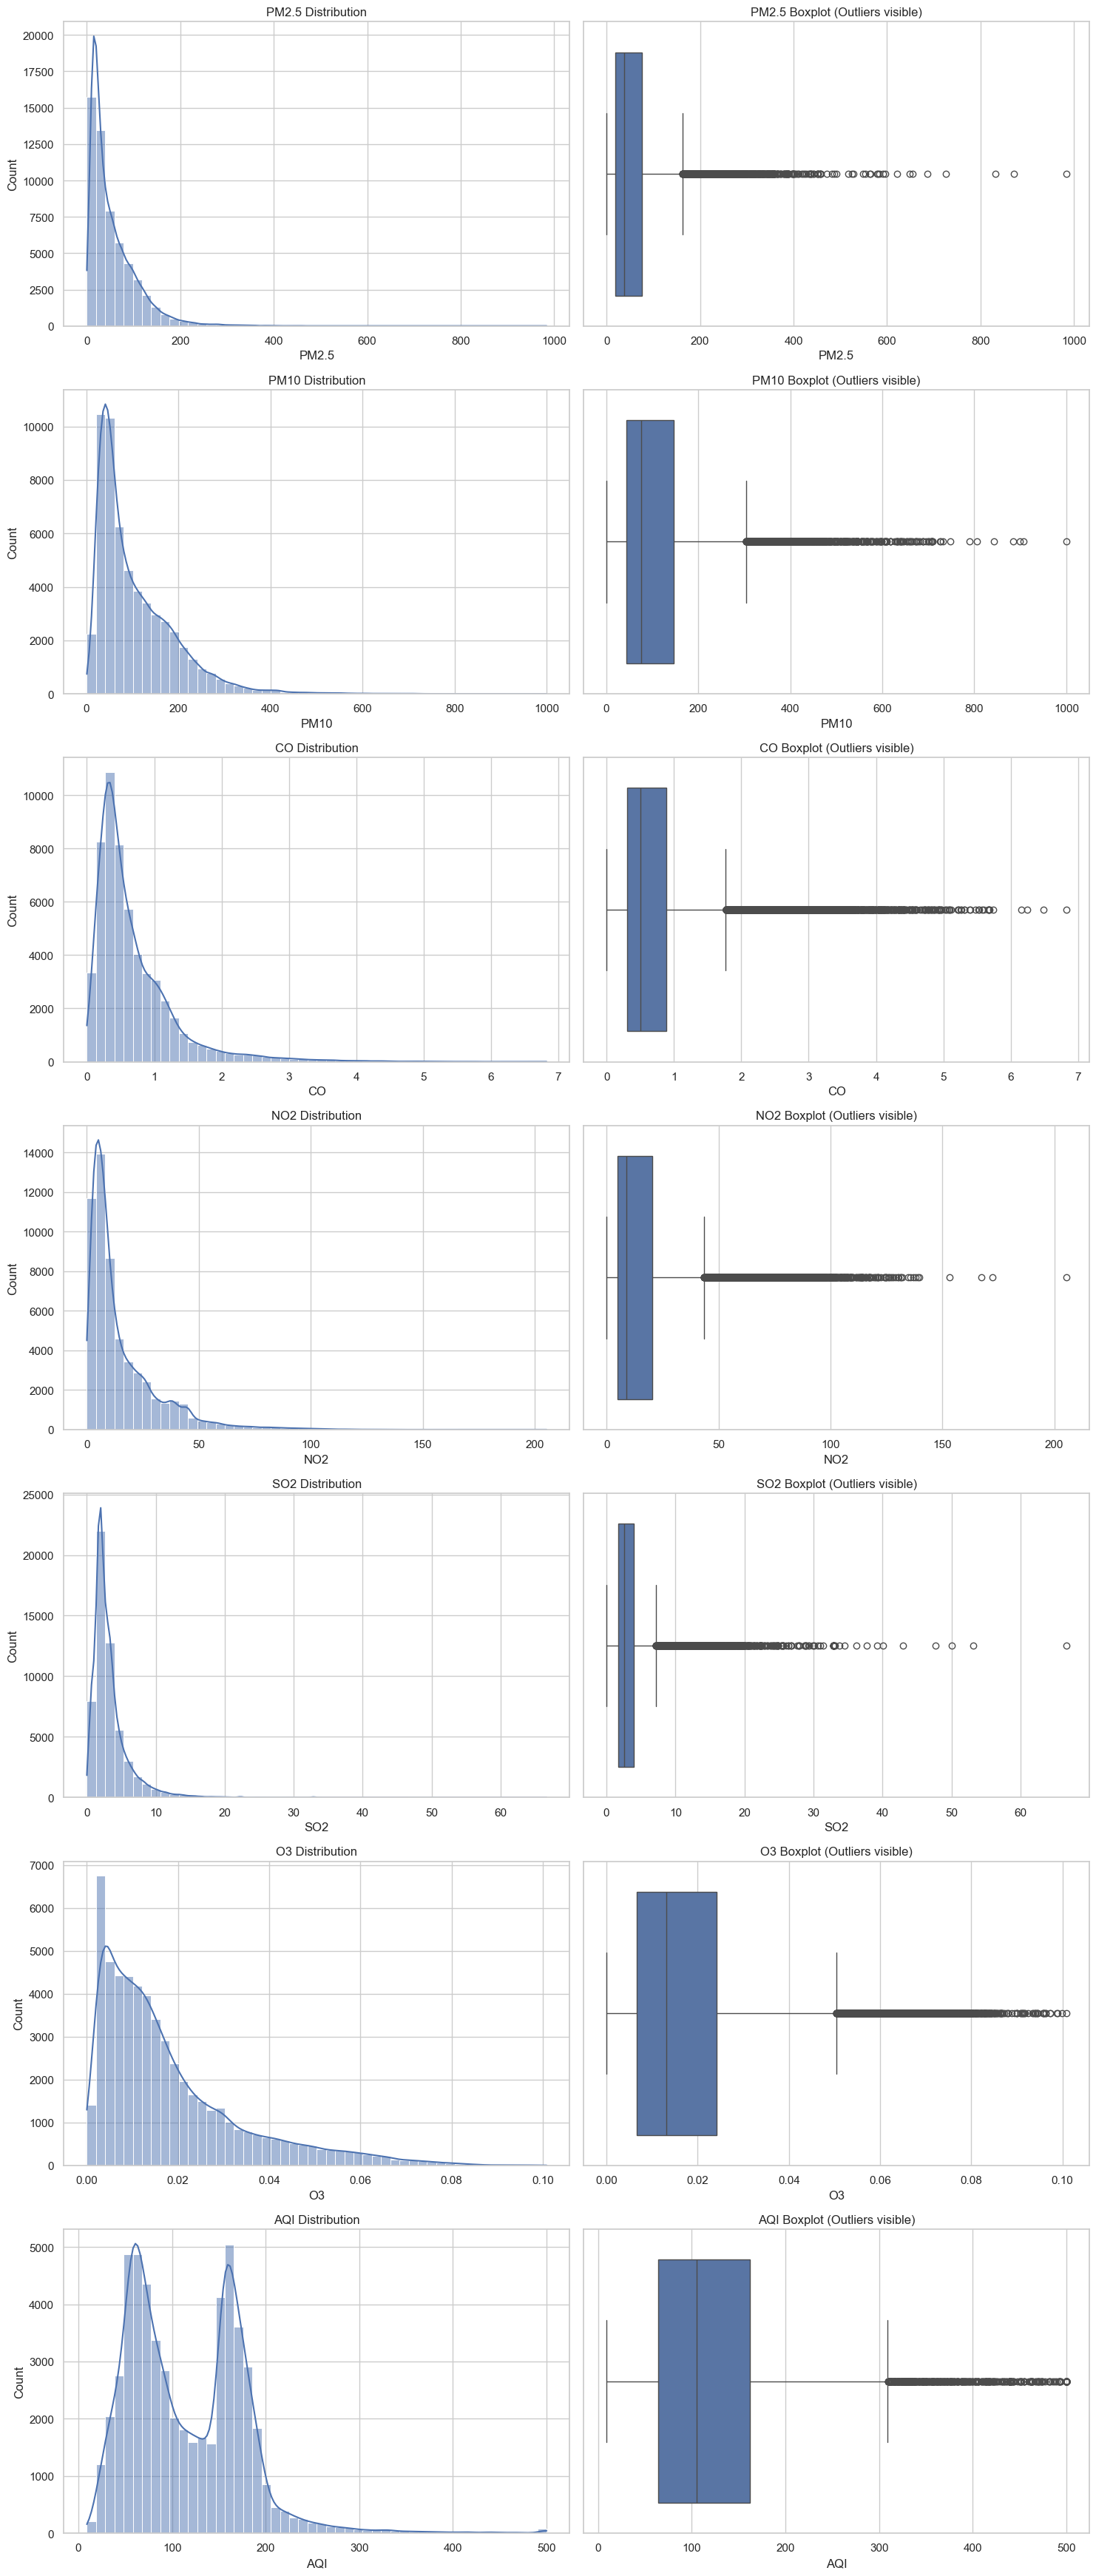

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
numeric_cols = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3', 'AQI']

# Plot histograms and boxplots for numeric columns to visualize distribution and outliers
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(15, 35))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i, 0], bins=50)
    axes[i, 0].set_title(f'{col} Distribution')
    
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Boxplot (Outliers visible)')
    
plt.tight_layout()
plt.show()


In [3]:
# Calculate the number of outliers in each numeric column using the IQR method
outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts

{'PM2.5': 2237,
 'PM10': 1696,
 'CO': 3147,
 'NO2': 3690,
 'SO2': 4131,
 'O3': 3229,
 'AQI': 538}